# Задачи

1. Загрузите данные, проверьте число наблюдений и столбцов, типы данных, наличие пропущенных значений, какие уникальные значения встречаются.
2. Постройте график распределения числа показов (Impressions) для каждой рекламы, прологарифмировав значения.
3. Создайте новую колонку c CTR. Посмотрите на описательные статистики и распределение.
4. Проанализируйте CTR с разбивкой по рекламной кампании.
5. Посчитайте стоимость за клик пользователя по объявлению (CPC). Изучите полученные значения, используя меры центральной тенденции и меры изменчивости. 
6. Визуализируйте CPC с разбивкой по полу пользователей, которым были показаны объявления. 
7. Посчитайте конверсию из клика в покупку.

Описание данных

1. ad_id – идентификатор объявления (рекламы)
2. xyz_campaign_id – идентификатор рекламной кампании в базе компании X
3. fb_campaign_id – идентификатор кампании в Facebook
4. age – возрастная группа, которой показывалась реклама
5. gender – пол тех, кому показывалась реклама
6. interest –код, указывающий категорию, к которой относится интерес пользователя (соответствие число – интерес)
7. impressions – число показов
8. clicks – число кликов
9. spent – сумма, которую компания потратила на показ объявления 
10. total_conversion – количество людей, которые заинтересовались продуктом после просмотра рекламы
11. approved_conversion – количество людей, которые купили продукт после просмотра рекламы

# Задача 1

Загрузите данные, проверьте число наблюдений и столбцов, типы данных, наличие пропущенных значений, какие уникальные значения встречаются.

Сколько уникальных рекламных кампаний было проведено? 

In [38]:
# импортируем необходимые библиотеки
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss 

In [39]:
# читаем данные файла, сохраняем в переменную
df = pd.read_csv('conversion.csv')

In [40]:
# приводим названия столбцов к нижнему регистру
df = df.rename(columns={'Impressions': 'impressions',
                    'Clicks': 'clicks',
                    'Spent': 'spent',
                    'Total_Conversion': 'total_conversion',
                    'Approved_Conversion': 'approved_conversion'})

In [41]:
df.isna().sum() # сколько пропущенных значений в каждом столбце

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
impressions            0
clicks                 0
spent                  0
total_conversion       0
approved_conversion    0
dtype: int64

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   impressions          1143 non-null   int64  
 7   clicks               1143 non-null   int64  
 8   spent                1143 non-null   float64
 9   total_conversion     1143 non-null   int64  
 10  approved_conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [43]:
df.nunique() #число уникальных значений по столбцам

ad_id                  1143
xyz_campaign_id           3
fb_campaign_id          691
age                       4
gender                    2
interest                 40
impressions            1130
clicks                  183
spent                   869
total_conversion         32
approved_conversion      16
dtype: int64

# Задача 2

Постройте график распределения числа показов (Impressions – сколько раз пользователи увидели данное объявление) для каждой рекламной кампании в Facebook, прологарифмировав значения. Выберите верные утверждения:

In [44]:
# сгруппировали номеру рекламы, посчитали сумму числа показов
log_fb = df.groupby('fb_campaign_id') \
    .agg({'impressions':'sum'})
log_fb = np.log(log_fb.impressions) #прологорифмировали число показов рекламных компаний в фейсбуке

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


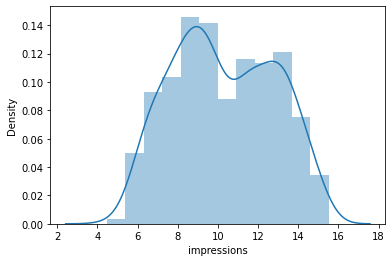

In [45]:
sns.distplot(log_fb) #построили дистплот

# Задача 3

Теперь посчитаем ещё несколько полезных метрик. Первая – CTR (click-through rate), которая показывает кликабельность, т.е. отношение числа кликов к количеству показов.

CTR= clicks / impressions

Создайте новую колонку, затем посмотрите на описательные статистики. В качестве ответа укажите ad_id объявления с наибольшим CTR.

In [46]:
# добавили новую колонку, в которой указывается отношение числа кликов к просмотрам
df['ctr'] = df.clicks / df.impressions
df

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,impressions,clicks,spent,total_conversion,approved_conversion,ctr
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1,0.000136
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0,0.000112
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,0,0.000000
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0,0.000235
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1,0.000242
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2,0.000223
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0,0.000188
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0,0.000185
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710000,8,2,0.000171


In [47]:
max_ctr = df.ctr.max().round(6) # вывели максимум по ctr
max_ctr 

0.001059

In [48]:
df.ctr.describe() # вывели опиательную статистику по столбцу ctr

count    1143.000000
mean        0.000164
std         0.000115
min         0.000000
25%         0.000100
50%         0.000160
75%         0.000234
max         0.001059
Name: ctr, dtype: float64

In [49]:
df.iloc[df.ctr.idxmax()] #нашли рекламу с максимальным ctr

ad_id                      738637
xyz_campaign_id               936
fb_campaign_id             109857
age                         45-49
gender                          F
interest                       24
impressions                   944
clicks                          1
spent                        1.42
total_conversion                1
approved_conversion             0
ctr                    0.00105932
Name: 150, dtype: object

# Задача 4

Визуализируйте CTR с разбивкой по номеру рекламной кампании (xyz_campaign_id). Какому графику соответствует распределение CTR кампании 916?

In [50]:
campaign_916 = df.query('xyz_campaign_id == 916')

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


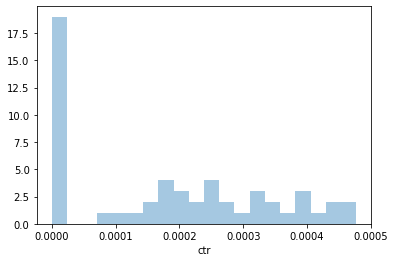

In [51]:
sns.distplot(campaign_916.ctr, kde = False, bins = 20)

# Задача 5

CPC (cost-per-click) – стоимость за клик пользователя по объявлению. Рассчитывается путём деления суммы потраченных денег на общее число кликов:

CPC= spent / clicks 

Выведите описательные статистики для новой переменной, посмотрите на форму распределения. В ответе укажите межквартильный размах, округленный до двух знаков после точки.

In [52]:
df['cpc'] = df.spent / df.clicks # добавляем столбец с данным срс

In [53]:
df.cpc.describe()

count    936.000000
mean       1.499347
std        0.232879
min        0.180000
25%        1.390000
50%        1.498273
75%        1.644364
max        2.212000
Name: cpc, dtype: float64

In [54]:
ss.iqr(df.cpc, nan_policy='omit') #рассчитали межквартильный размах

0.25436369905

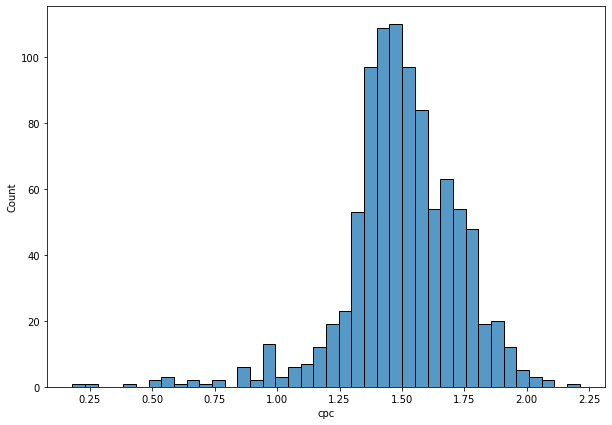

In [55]:
plt.figure(figsize=(10,7)) #построили дистплот распределения параметра cpc
sns.histplot(df.dropna(), x = 'cpc')

# Задача 6

Визуализируйте CPC с разбивкой по полу пользователей, которым были показаны объявления. Какой график получился?

In [56]:
# сохранили в отдельные переменные таблицы по полам
df_gf = df.query('gender == "F"').dropna()
df_gm = df.query('gender == "M"').dropna()

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


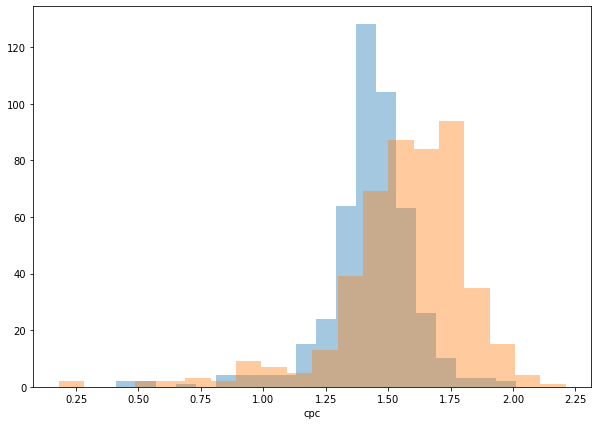

In [57]:
plt.figure(figsize=(10,7)) #построили дистплот распределения параметра cpc по гендерному признаку

sns.distplot(df_gf.cpc, kde = False, bins = 20)

sns.distplot(df_gm.cpc, kde = False, bins = 20)

# Задача 7

Конверсия (conversion rate) – отношение числа пользователей, совершивших целевое действие на определенном этапе, к общему числу тех, кто дошел до данного этапа.

Посчитайте конверсию из клика в покупку. В качестве ответа укажите конверсию для объявления 1121814 в процентах, округлив значение до 2 знаков после точки.

In [58]:
# сохранили в отдельную переменную действия по объявлению 1121814
df_with_cr = df.query('ad_id == 1121814')
df_with_cr


,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,impressions,clicks,spent,total_conversion,approved_conversion,ctr,cpc
860,1121814,1178,144659,30-34,F,27,2223278,421,612.300003,38,13,0.000189,1.454394


In [59]:
# рассчитали CR для объявления
df_with_cr.approved_conversion / df_with_cr.clicks * 100

860    3.087886
dtype: float64